## Final Project Submission

* Student name: Emily Marsh
* Student pace: Flex
* Scheduled project review date/time: 
* Instructor name: Joe Comeaux

## Introduction

Henbart LLC, a real estate developer in the Seattle area, is interested in developing more properties outside of the Seattle metropolitan area. They are responding to the pandemic-era trend where there has been more demand for single-family homes, however with inflation they want to make sure to build houses that will maximize their ROI. The statistical analysis of the Kings County Dataset will show which features maximize profit and will inform the type of homes and properties Henbart LLC will invest in. 

Content Exploration

Re-sell value of the house will be determined by price and statistical analysis will focus on property features that maximize this price. Analysis will focus on the features provided in the King County House Sales dataset.

In [1]:
#importing cleaning, statistical analysis, and data visualization programs

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from scipy import stats
from sklearn import preprocessing
from statsmodels.stats.stattools import durbin_watson
import pylab

import seaborn as sns
import numpy as np
%matplotlib inline

[(0.9155979, 0.55210684, 0.42070204), (0.888292, 0.40830288, 0.36223756), (0.81942908, 0.28911553, 0.38102921), (0.69226314, 0.23413578, 0.42480327), (0.56041794, 0.19845221, 0.44207535), (0.42355299, 0.16934709, 0.42581586)]


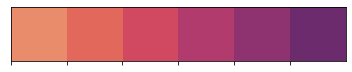

In [2]:
pal = sns.color_palette("flare")
print(pal)
sns.palplot(pal)

## Dataset Exploration and Preparation

Importing the King County House Sales dataset and preparing the dataset for statistical analysis and modeling

In [3]:
#using CSV reader to read dataframe into pandas
df = pd.read_csv("data/kc_house_data.csv")

In [4]:
#overview of features available in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
#Summary of mean, quartiles, and std in the dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Looking at the summary of the data set there are some details of interest given about the features. There are fifteen features with 21597 entries. There is also some interesting information given about the quartiles and possible outliers. 

In [6]:
# Dropping columns that are irrelevant to analysis of the data

In [7]:
df = df.drop(['date','view', 'sqft_above', 'sqft_basement', 'waterfront','zipcode','lat','long', 'sqft_living15','sqft_lot15','id'], axis=1)

In order to focus in on features that are the most relevenat to the analysis, the following columns were dropped. The locations where single family homes are to be developed have already been purchased, so the features pertaining to location are irrelevant. These included zipcode, lat, long, waterfront, and view. Identifying features are also irrelevant to the analysis (date, id) and to avoid multicollinearity similar columns were dropped leaving only one to summarize the feature. These included sqft_above, sqft_basement, sqft_living15, and sqft_above.

In [8]:
#dataframe head after columns have been dropped
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1955,0.0
1,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,1951,1991.0
2,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,1933,NaN
3,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1965,0.0
4,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1987,0.0
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,Average,8 Good,2009,0.0
21593,400000.0,4,2.50,2310,5813,2.0,Average,8 Good,2014,0.0
21594,402101.0,2,0.75,1020,1350,2.0,Average,7 Average,2009,0.0
21595,400000.0,3,2.50,1600,2388,2.0,Average,8 Good,2004,0.0


In [9]:
# Exploring yr_renovated

df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

The year the house is renovated is not as important to the analysis as whether it was renovated. Using boolean feature will change this column to be either a True value for renovated or False for not renovated. 

In [10]:
#Adding a boolean feature to this column

conditions = [df.loc[:,'yr_renovated'] > 0,
              df.loc[:,'yr_renovated'] == 0]

values = [1,0]

df.loc[:,'is_renovated'] = np.select(conditions, values, default=0)

df['is_renovated'].value_counts()

0    20853
1      744
Name: is_renovated, dtype: int64

In [11]:
# Dropping the yr_renovated column

df = df.drop('yr_renovated', axis = 1)

The last column that needs to be adjusted is the yr_built. In order to use the information provided in this column more effectively, a new column will be created with the age of the building. 

In [12]:
#create new column age_in_yr with current year minus year built
df.loc[:,'age_in_yr'] = (
    (2022-df['yr_built'])
    )
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,is_renovated,age_in_yr
0,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1955,0,67
1,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,1951,1,71
2,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,1933,0,89
3,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1965,0,57
4,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1987,0,35


In [13]:
#drop yr_built column

df = df.drop('yr_built', axis = 1)

## Categorical Variables

In order to create a linear regression model, the categorical features in the dataset need to be prepared. 

In [14]:
#Checking dataset for column type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21597 non-null  float64
 1   bedrooms      21597 non-null  int64  
 2   bathrooms     21597 non-null  float64
 3   sqft_living   21597 non-null  int64  
 4   sqft_lot      21597 non-null  int64  
 5   floors        21597 non-null  float64
 6   condition     21597 non-null  object 
 7   grade         21597 non-null  object 
 8   is_renovated  21597 non-null  int64  
 9   age_in_yr     21597 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 1.6+ MB


The two categorical features in this data set are condition and grade.

In [15]:
#exploring value types for condition column
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [16]:
#create changes the datatype of a variable to a niche categorical datatype
df['condition'] = pd.Categorical(df['condition'], ['Poor', 'Fair', 'Average', 'Good', 'Very Good'], ordered=True)

#assigning categorical datatype values to condition column
df['condition'] = df['condition'].cat.codes


In [17]:
#check new values for condition column
df['condition'].value_counts()

2    14020
3     5677
4     1701
1      170
0       29
Name: condition, dtype: int64

In [18]:
#exploring value types for grade column
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [19]:
#create changes the datatype of a variable to a niche categorical datatype
df['grade'] = pd.Categorical(df['grade'], ['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good','11 Excellent','12 Luxury', '13 Mansion'], ordered=True)

#assigning categorical datatype values to condition column
df['grade'] = df['grade'].cat.codes

In [20]:
#check new values of grade column
df['grade'].value_counts()

4     8974
5     6065
6     2615
3     2038
7     1134
8      399
2      242
9       89
1       27
10      13
0        1
Name: grade, dtype: int64

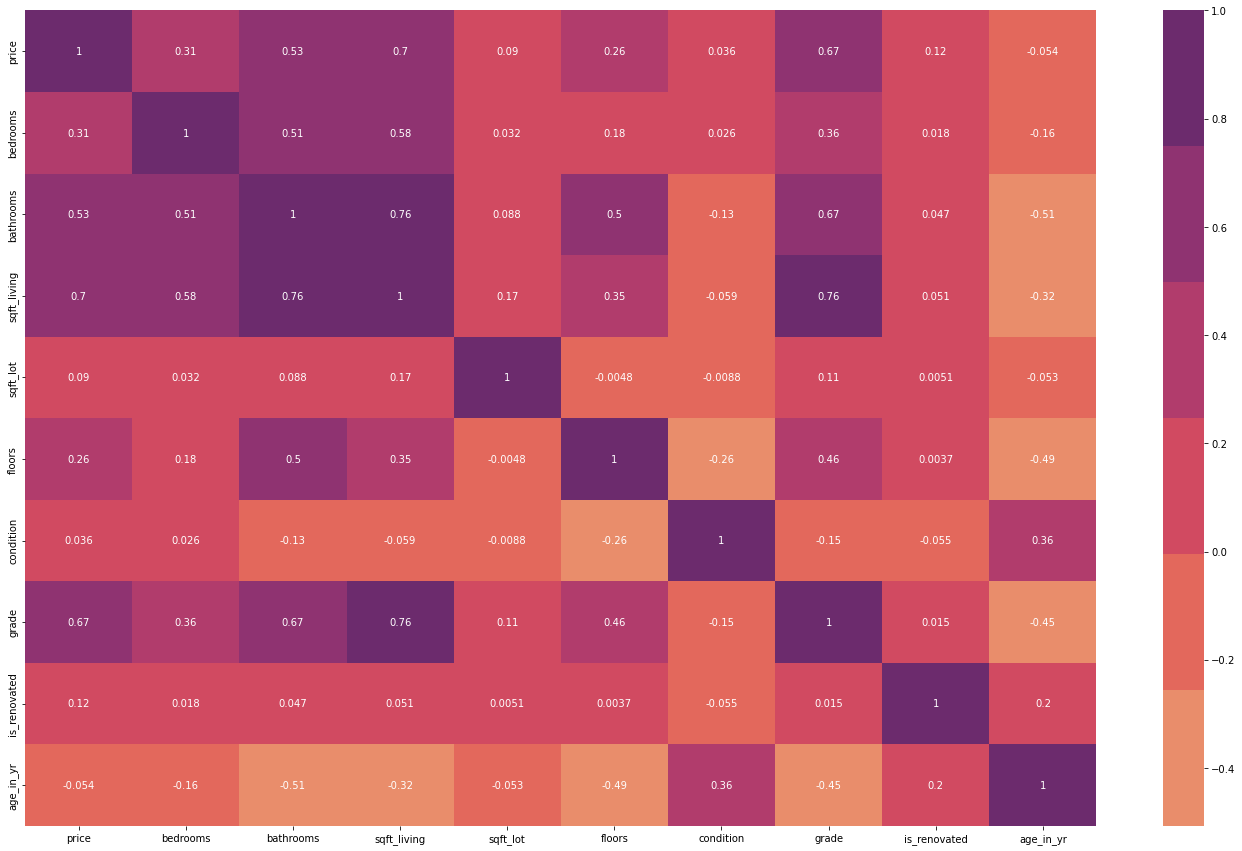

In [21]:
# Early correlation matrix to understand relationships within the features that are being analyzed

plt.figure(figsize= (24,15))
corrM = df.corr()

sns.heatmap(corrM, annot = True, cmap=pal)
plt.show()


Looking at the correlation matrix the strongest correlations between the dependent variable of price and the features appear to be sqft_living, grade, and bathrooms. There also seems to be some strong correlations between features that may require additional investigation. 

## Initial Exploratory Data Analysis of Features

Before implementing statisical analysis on the dataset, additional exploration of the data of each feature is necessary to determine the quality of the data in the dataset. 

In [22]:
# Examine initial distribution of features

df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,is_renovated,age_in_yr
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,2.409825,4.657915,0.034449,51.000324
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,0.182384,29.375234
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,0.000000,7.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,2.000000,4.000000,0.000000,25.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,2.000000,4.000000,0.000000,47.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,3.000000,5.000000,0.000000,71.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,10.000000,1.000000,122.000000


Overall the average price of 540k compared to the median price of 450k indicated outliers in the data. The feature of bedrooms and bathrooms also indicates this with a max of 33 and 8 respectively, both significantly higher then the 75 quartile of the values. This is also reflected in sqft_lot and floors. 

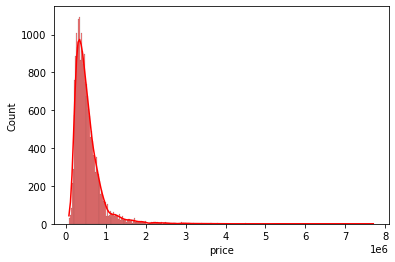

In [23]:
#distribution of the depedent variable price

sns.histplot(data=df, x='price', kde=True, color='red');

The distribution of values for price seem to be right skewed which can be indicative of outliers. Transformation of the dependent value as a log value may be a possible solution. 

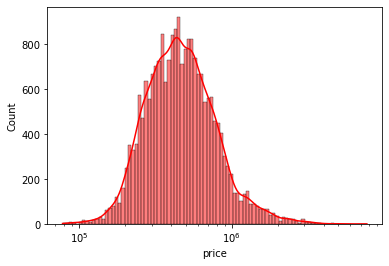

In [24]:
sns.histplot(data=df, x='price', kde=True, log_scale=True, color='red');

The skew of the distribution of the dependent variable seems to have been greatly helped by using the log value. This will be helpful later in statistical analysis of the dataset. 

## Outliers

Since the summary revealed the possiblity of significant outliers in the dataset, using a boxplot will help create a more detailed visual. 

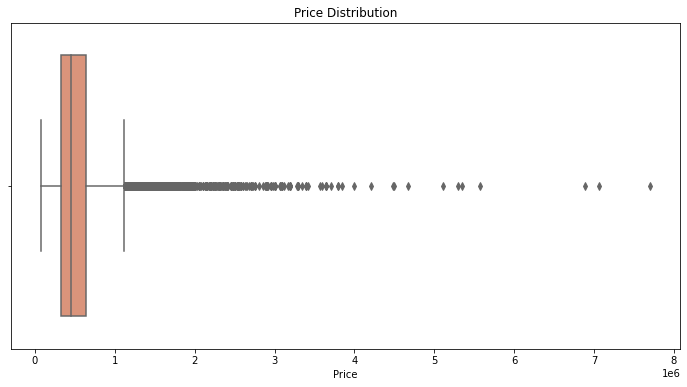

In [25]:
fig, ax = plt.subplots(figsize=(12,6))

ax.set_title('Price Distribution')


bp = sns.boxplot(data=df, 
            x='price',  
            palette=pal)

bp.set_xlabel('Price');

The boxplot confirms the prescence of extreme outliers in the data. Doing a more indepth look at the features of Bathroom, Bedrooms, Floors, and Sqft_lot.

''

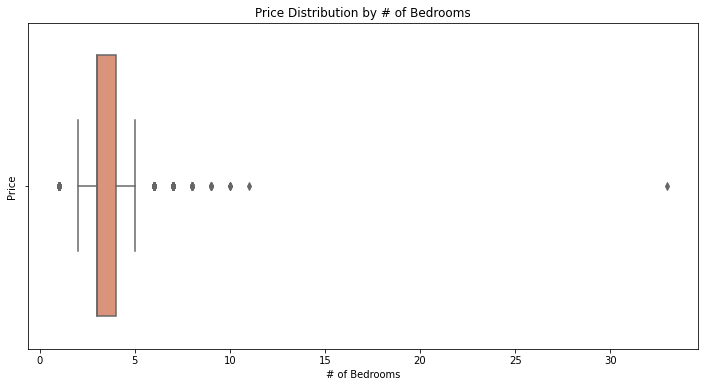

In [26]:
# Boxplot of bedrooms distribution
fig, ax = plt.subplots(figsize=(12,6))

ax.set_title('Price Distribution by # of Bedrooms')


bp = sns.boxplot(data=df, 
            x='bedrooms', 
            palette=pal)

bp.set_ylabel('Price')
bp.set_xlabel('# of Bedrooms')
;

''

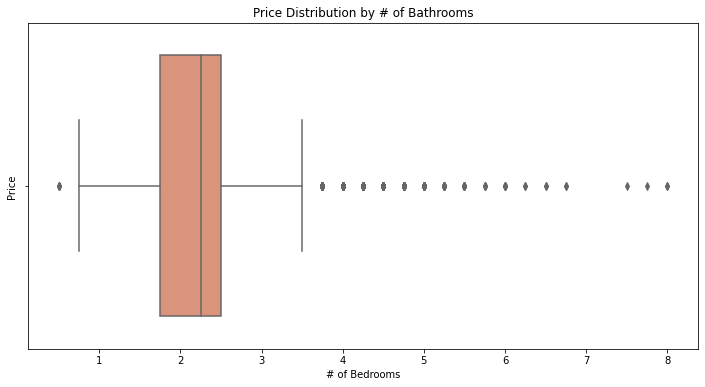

In [27]:
# Boxplot of bathroom distribution
fig, ax = plt.subplots(figsize=(12,6))

ax.set_title('Price Distribution by # of Bathrooms')


bp = sns.boxplot(data=df, 
            x='bathrooms', 
            palette=pal)

bp.set_ylabel('Price')
bp.set_xlabel('# of Bedrooms')
;

''

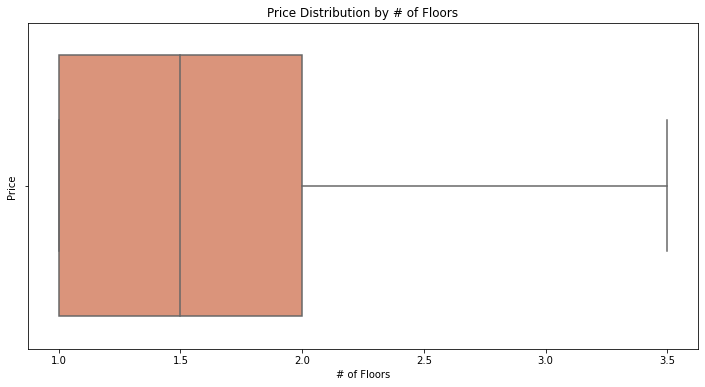

In [28]:
# Boxplot of bedrooms distribution
fig, ax = plt.subplots(figsize=(12,6))

ax.set_title('Price Distribution by # of Floors')


bp = sns.boxplot(data=df, 
            x='floors', 
            palette=pal)

bp.set_ylabel('Price')
bp.set_xlabel('# of Floors')
;

''

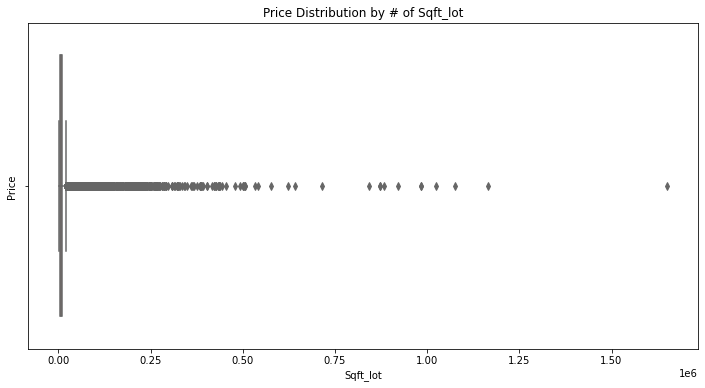

In [29]:
# Boxplot of sqft_lot distribution
fig, ax = plt.subplots(figsize=(12,6))

ax.set_title('Price Distribution by # of Sqft_lot')


bp = sns.boxplot(data=df, 
            x='sqft_lot', 
            palette=pal)

bp.set_ylabel('Price')
bp.set_xlabel('Sqft_lot')
;

Using the boxplots, the main features with the most outliers are bedrooms, bathrooms, and sqft_lot. There is an extreme value for all three, specifically looking into this entry will be my next step to determine whether it should be eliminated. 

In [30]:
# isolating the bedroom row with 33 bedrooms for further inspection

df.loc[df['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,is_renovated,age_in_yr
15856,640000.0,33,1.75,1620,6000,1.0,4,4,0,75


In [31]:
# isolating the bathroom row with 8 bathrooms for further inspection

df.loc[df['bathrooms'] == 8]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,is_renovated,age_in_yr
7245,7700000.0,6,8.0,12050,27600,2.5,3,10,1,112
12764,2280000.0,7,8.0,13540,307752,3.0,2,9,0,23


In [32]:
# isolating the sqft_lot row with the max value for further inspection

maxval = df['sqft_lot'].max()

df.loc[df['sqft_lot'] == maxval]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,is_renovated,age_in_yr
1717,700000.0,4,1.0,1300,1651359,1.0,3,3,0,102


After exploration the only outlier that seems obviously incorrect was the bedroom outlier. This entry had 33 bedrooms and 1.75 bathrooms which seems highly unlikely. It seems more likely that this outlier was due to a mis entry of 33 instead of 3. 

In [33]:
# replacing 33 bedroom value with 3 bedrooms

df['bedrooms'] = df['bedrooms'].replace([33],3)

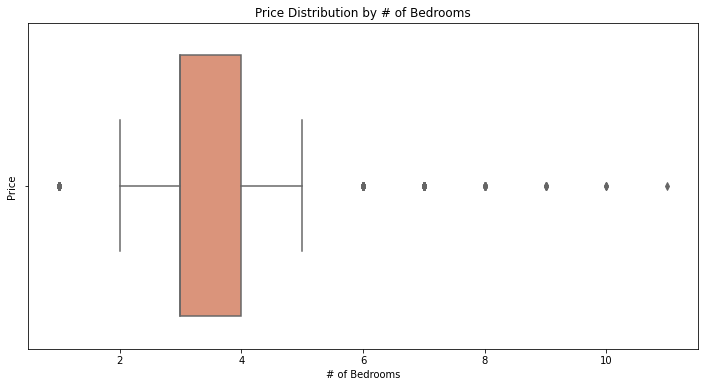

In [34]:
# check the distribution without this outlier value

fig, ax = plt.subplots(figsize=(12,6))

ax.set_title('Price Distribution by # of Bedrooms')


bp = sns.boxplot(data=df, 
            x='bedrooms', 
            palette=pal)

bp.set_ylabel('Price')
bp.set_xlabel('# of Bedrooms');

The new distribution of the bedroom values seem a lot more consistent. It also keeps bedrooms as a feature from becoming over inflated in terms of it's influence on the dependent variable price. The other outliers will remain in the data and after running the model it will be determined if dropping them or keeping them will help the accuracy of the linear regression model. 

## StatsModels Multiple Linear Regression

## Model One

Now that the data has been adquately prepared, statistical analysis tools can now be implemented

In [35]:
# create predictors
predictors = df.drop(['price'], axis=1)

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model = sm.OLS(df['price'],predictors_int).fit()

# Coefficents

Using the coefficent values will help determine if there is a positive or negative relationship between the features and the dependent variable which in this case is price. 

In [36]:
#coefficents for model
model.params

const          -670906.060713
bedrooms        -53350.753041
bathrooms        51962.920519
sqft_living        190.185300
sqft_lot            -0.253445
floors           20318.479153
condition        21624.471217
grade           130153.304724
is_renovated     46803.630687
age_in_yr         3901.987089
dtype: float64

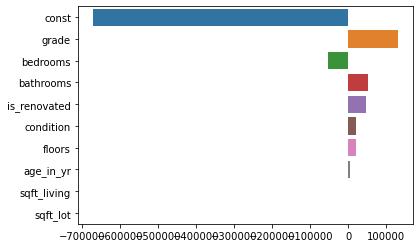

In [37]:
#creating tornadoe diagram of coefficent values
coeff = model.params
coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]
sns.barplot(x=coeff.values, y=coeff.index, orient='h');

The coefficent values show that every feature has a positive effect on price except for bedrooms. This will be explored further in the model summary. 

## Model One Summary

In [38]:
#view results of model one
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     3903.
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:57:06   Log-Likelihood:            -2.9696e+05
No. Observations:               21597   AIC:                         5.939e+05
Df Residuals:                   21587   BIC:                         5.940e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6.709e+05   1.28e+04    -52.576      0.000   -6.96e+05   -6.46e+05
bedrooms     -5.335e+04   2207.252    -24.171      0.000   -5.77e+04    -4.9e+04
bathrooms     5.196e+04   3613.697     14.379      0.000    4.49e+04     5.9e+04
sqft_living    190.1853      3.434     55.385      0.000     183.455     196.916
sqft_lot        -0.2534      0.038     -6.646      0.000      -0.328      -0.179
floors        2.032e+04   3588.857      5.662      0.000    1.33e+04    2.74e+04
condition     2.162e+04   2606.994      8.295      0.000    1.65e+04    2.67e+04
grade         1.302e+05   2237.394     58.172      0.000    1.26e+05    1.35e+05
is_renovated   4.68e+04   8902.423      5.257      0.000    2.94e+04    6.43e+04
age_in_yr     3901.9871     72.349     53.933      0.000    3760.178    4043.796
==============================================================================
Omnibus:                    17149.963   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1173452.343
Skew:                           3.312   Prob(JB):                         0.00
Kurtosis:                      38.498   Cond. No.                     3.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The summary of the fit model gives some insight into the fit of the model. First is the R-squared value which shows us that 61.9% of the variation is explained by the model. The F statistic of the model is 3903 and the probability of the F statistic is zero which allows us to reject the null hypothesis that the interecept only model provides a better fit then the independent variables. The T values for the independent variables are all zero so therefore we can also use this to say with confidence that we can reject the null hypothesis as well. As of now the features with largest coefficent values are grade, bathrooms, is_renovated, condition, and floors. The last important peice of information provided by the summary is that the model has significant skew and kurtosis.

## Mean Absolute Error
Mean Absolute Error(MAE) represents the average error of the model. This will help with determining the accuracy of the models results.

In [39]:
# return residuals from model
residuals = model.resid
# view residuals
residuals

0        -67705.064174
1       -163242.855373
2        -39567.768023
3        111081.502597
4         68665.519546
             ...      
21592    -35342.579837
21593    -49321.315214
21594    291864.569576
21595     -7528.426329
21596    210792.138458
Length: 21597, dtype: float64

In [40]:
# return predicted values from model
y_pred = model.fittedvalues
# view predicted values
y_pred

0        289605.064174
1        701242.855373
2        219567.768023
3        492918.497403
4        441334.480454
             ...      
21592    395342.579837
21593    449321.315214
21594    110236.430424
21595    407528.426329
21596    114207.861542
Length: 21597, dtype: float64

In [41]:
# true y value
y = df["price"]

In [42]:
# return mean absolute error of model
mae_resid = np.mean(np.abs(y - y_pred))
# view residuals from model
mae_resid

145068.2038168714

The MAE informs us that on average, our model has an error of 145068 USD when predicting the price of a house.

## Assumptions of Linear Regression
Making sure the model fufills the assumptions of linear regression will determine how trustworthy the results are in our statistical analysis

# Linearity
Using pair plots will be helpful in determining if there is a linear relationship between the depedent and independent variables

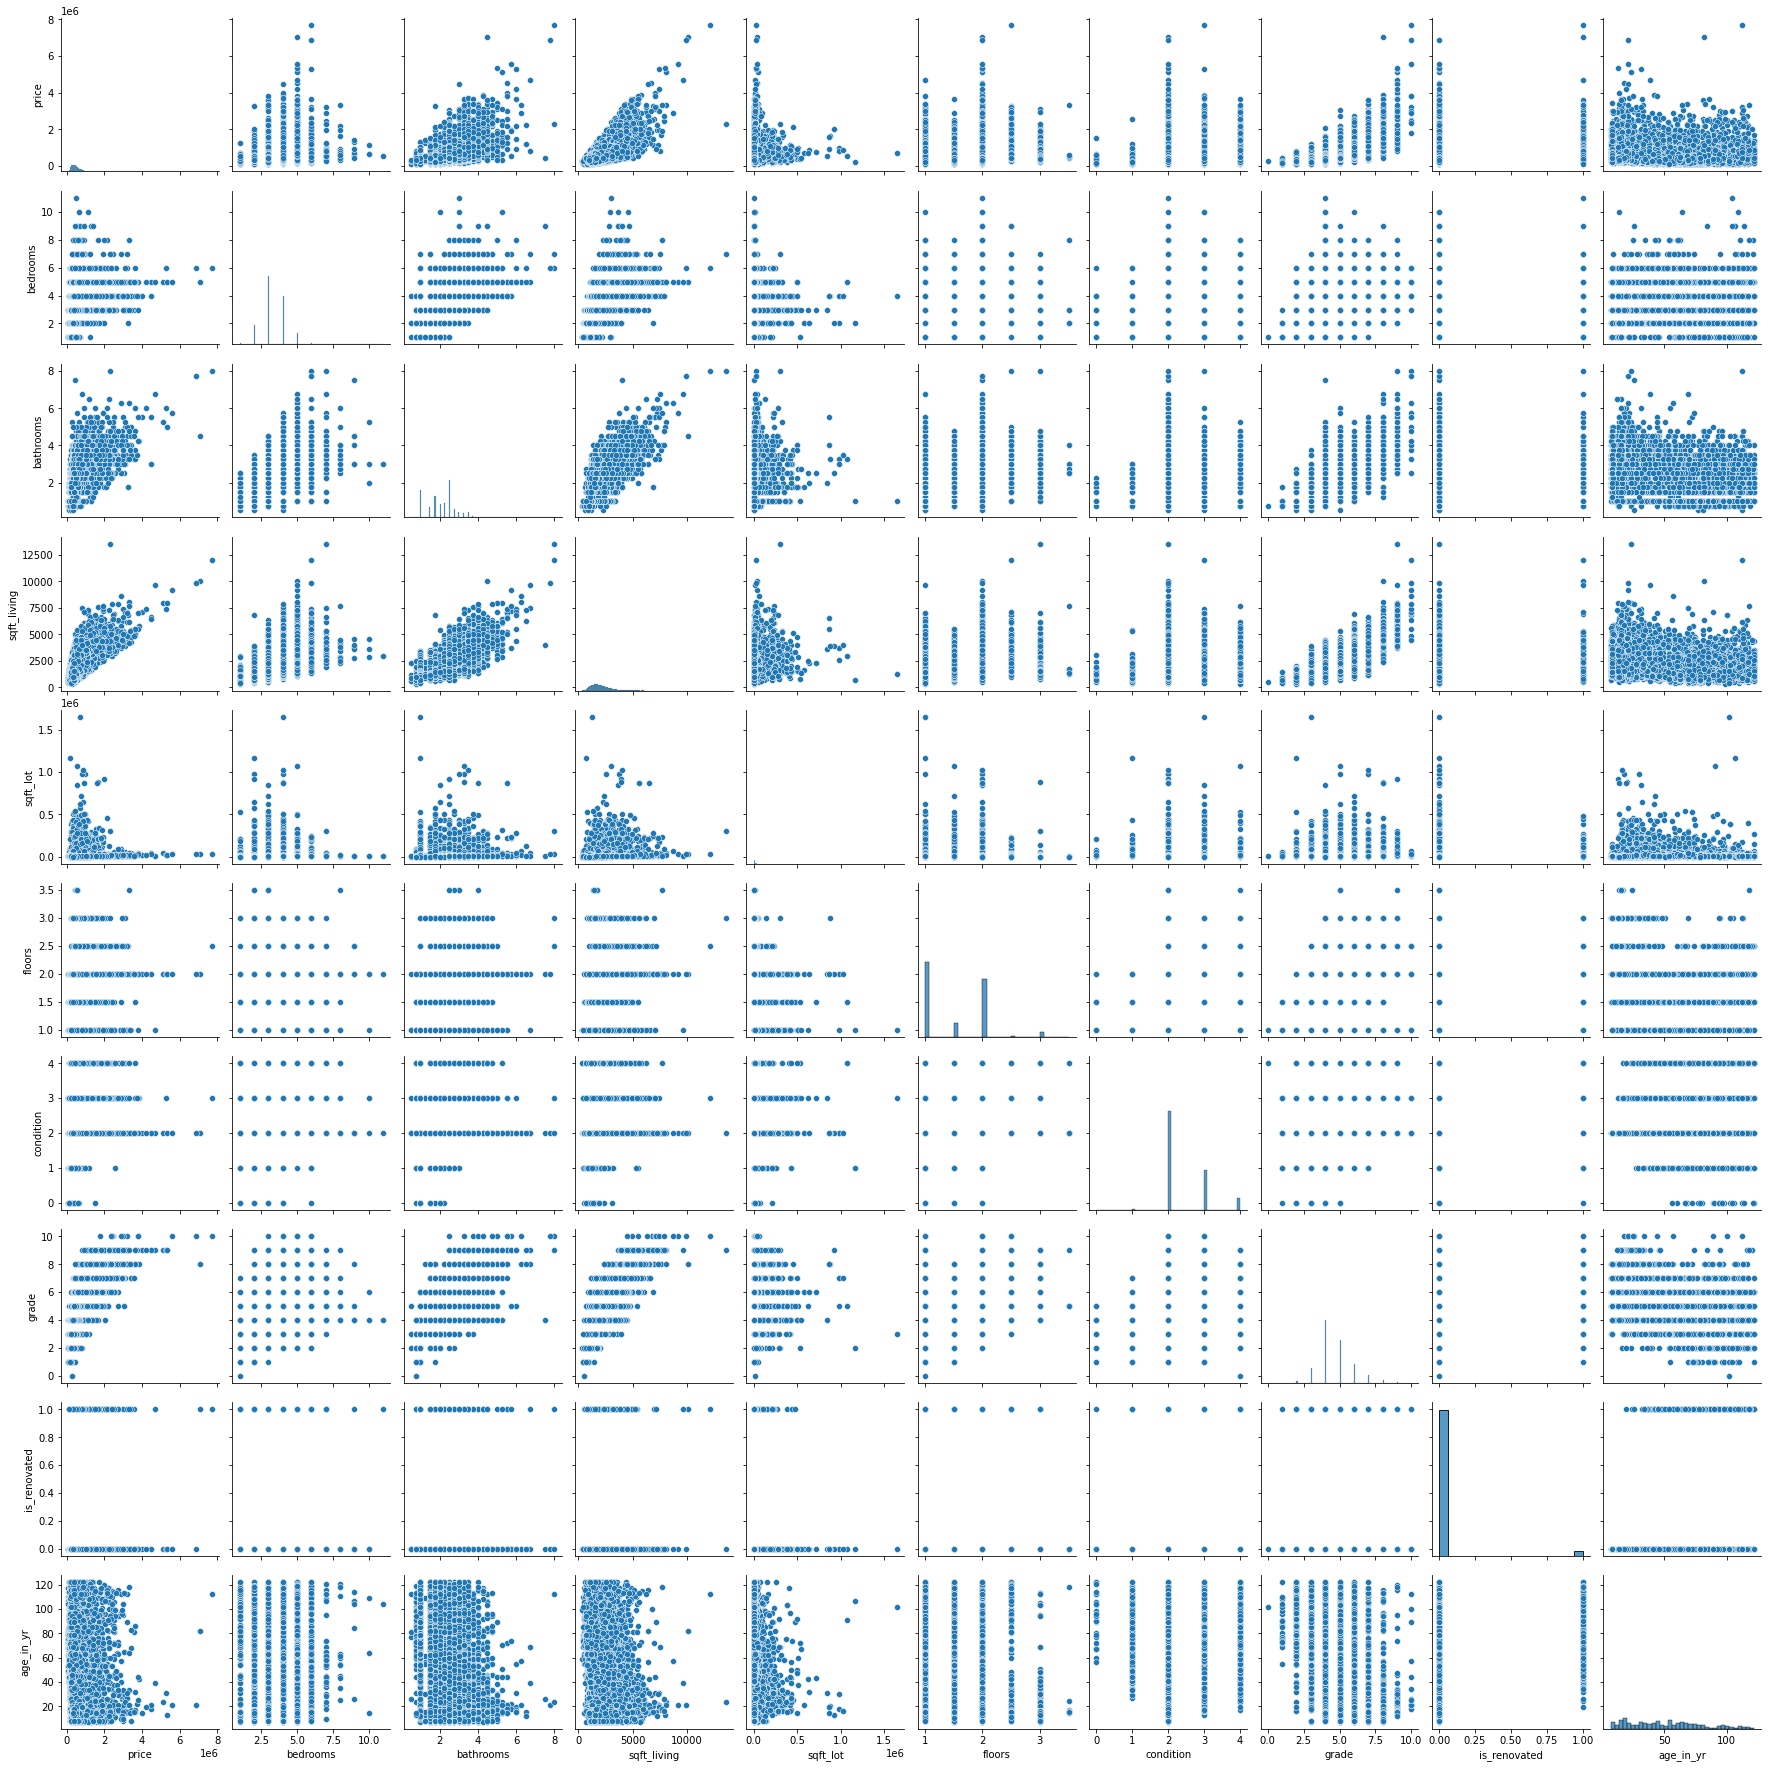

In [43]:
# Graph pairplots to determine linearity
sns.pairplot(df);

Looking at the pairplots the features with the strongest linear releationships with price seem to be bathrooms, sqft_living, sqft_lot, grade. However there seem to be outliers for all three charts.

## Homoscedasticity
Homoscedasticity is the third assumption necessary when creating a linear regression model. By plotting the residuals versus the predicted y value it can be determined whether the null hypothesis can be rejeceted.

/Users/emilymarsh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/emilymarsh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


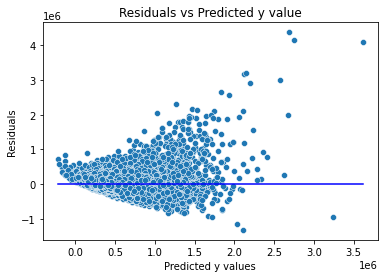

In [44]:
# Homoscedasticity
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('Predicted y values')
plt.ylabel('Residuals')

p = sns.lineplot([y_pred.min(),y_pred.max()],[0,0],color='blue')
p = plt.title('Residuals vs Predicted y value')

In [45]:
#Goldfeld Quandt Test
name = ['F statistic', 'p-value']


test = sms.het_goldfeldquandt(residuals, predictors_int)
lzip(name, test)

[('F statistic', 0.9040842280286595), ('p-value', 0.9999999176855394)]

Here our p-value is 0.999 much greater than 0.05. This means we are able to reject the null hypothesis which states our error terms are homoscedastic.

This further validates the assumption of heterodascity of our residuals.

## Normality

An assumption for linear regression is that residuals are normally distributed. This normality can be seen in a histogram as well as the skew of the data. 

/Users/emilymarsh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


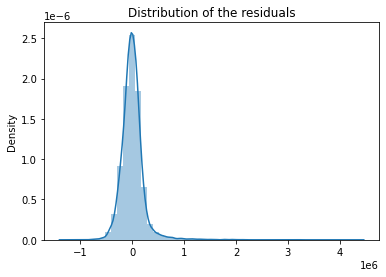

In [46]:
# check for normality among the residuals
p = sns.distplot(residuals,kde=True)
p = plt.title('Distribution of the residuals')

In [47]:
# create mean and standard deviation
mu, std = stats.norm.fit(residuals)
mu, std

(2.654348252332613e-07, 226649.63510965536)

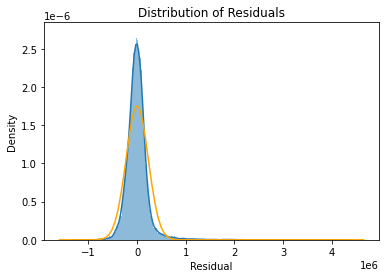

In [48]:
fig, ax = plt.subplots()
# plot the residuals
sns.histplot(x=residuals, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of Residuals", xlabel="Residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

/Users/emilymarsh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

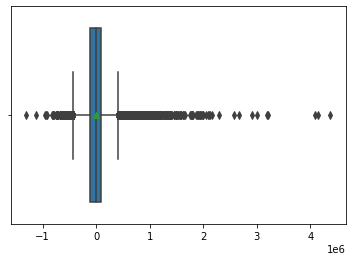

In [49]:
# view boxplot of residuals
sns.boxplot(residuals, showmeans=True)

## QQ Plot

The QQ plot is another way to visually confirm if the a given distribution belongs to a normal distribution.

/var/folders/n7/k7pk0gjj0rz19t5ylpv09t2w0000gn/T/ipykernel_27340/71005739.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


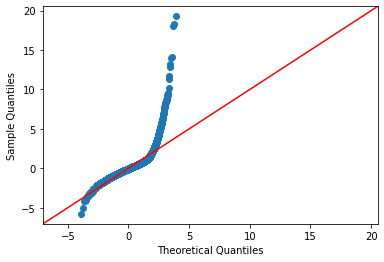

In [50]:
# create a Q-Q plot of the residuals
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

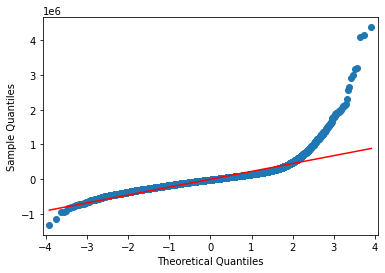

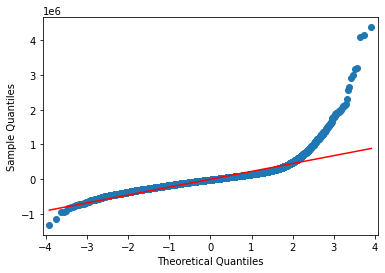

In [51]:
sm.qqplot(residuals, line ='s')

((array([-3.99686021, -3.78162805, -3.66389368, ...,  3.66389368,
          3.78162805,  3.99686021]),
  array([-1312764.32759548, -1131690.3932052 ,  -953782.50590185, ...,
          4089540.59514078,  4137956.24326883,  4371947.20652936])),
 (204227.71060597204, 2.655315483290704e-07, 0.9009118092451807))

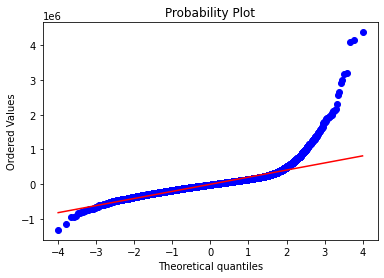

In [52]:
stats.probplot(residuals, dist="norm", plot=pylab)

This analysis of our first model shows that there are assumptions of linearity being violated. By removing outliers, it will be seen if the quality of the model can be improved. 

## Model Two: Removing Outliers

For this second model, all outliers from all features will be removed from the data to improve statistical accuracy of the model

In [53]:
#Remove outliers
# IQR

df2 = df.copy()

Q1 = np.percentile(df['price'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['price'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['price'] >= (Q3+1*IQR))
# Lower bound
lower = np.where(df['price'] <= (Q1-1*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (21597, 10)
New Shape:  (19940, 10)


In [54]:
predictors = df.drop(['price'], axis=1)
predictors_int = sm.add_constant(predictors)

model = sm.OLS(df['price'],predictors_int).fit()

In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     2509.
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:57:20   Log-Likelihood:            -2.6316e+05
No. Observations:               19940   AIC:                         5.263e+05
Df Residuals:                   19930   BIC:                         5.264e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.553e+05   8153.135    -43.574      0.000   -3.71e+05   -3.39e+05
bedrooms     -1.628e+04   1367.164    -11.907      0.000    -1.9e+04   -1.36e+04
bathrooms     2.851e+04   2239.278     12.732      0.000    2.41e+04    3.29e+04
sqft_living     84.9694      2.274     37.372      0.000      80.513      89.426
sqft_lot         0.0472      0.024      1.964      0.050       0.000       0.094
floors        3.659e+04   2182.507     16.766      0.000    3.23e+04    4.09e+04
condition     1.554e+04   1566.962      9.916      0.000    1.25e+04    1.86e+04
grade         9.498e+04   1420.517     66.863      0.000    9.22e+04    9.78e+04
is_renovated  1936.5221   5733.520      0.338      0.736   -9301.653    1.32e+04
age_in_yr     2548.3146     45.206     56.371      0.000    2459.707    2636.922
==============================================================================
Omnibus:                      408.777   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              463.152
Skew:                           0.315   Prob(JB):                    2.68e-101
Kurtosis:                       3.402   Cond. No.                     3.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looking at the model summary there have been some impacts from the dropping of outlier values. The R-squared value has gone down from the previous model to 53.1 percent of the variation in the data being explained. The probability of the F statistic is still zero which allows us to still reject the null hypothesis that the interecept only model provides a better fit then the independent variables. However, the p-values of the features have all remained at zero except for is_renovated which went up to .736. Grade, Floors and bathrooms coefficent values have increased, while the coefficent value of sqft_living has decreased. We also see significant decreases in the skew and kurtosis which means the data is much more normally distributed. 

## Mean Absolute Error Model Two

In [56]:
# return predicted values from model
y_pred = model.fittedvalues
# view predicted values
y_pred

0        343259.329039
1        545801.911596
2        285989.542185
3        455839.051839
4        427801.756523
             ...      
21592    446106.434626
21593    446990.021214
21594    237596.785590
21595    428262.203285
21596    240132.174379
Length: 19940, dtype: float64

In [57]:
# true y value
y = df["price"]

In [58]:
# return mean absolute error of model
mae_resid = np.mean(np.abs(y - y_pred))
# view residuals from model
mae_resid

103193.1004209157

The MSE of model two has gone down to 103193 USD on average. This is an improvement from our previous model.

## Coefficent Values of Model Two

In [59]:
model.params

const          -355268.348365
bedrooms        -16278.890341
bathrooms        28509.806445
sqft_living         84.969411
sqft_lot             0.047174
floors           36592.961303
condition        15538.334544
grade            94979.348498
is_renovated      1936.522148
age_in_yr         2548.314586
dtype: float64

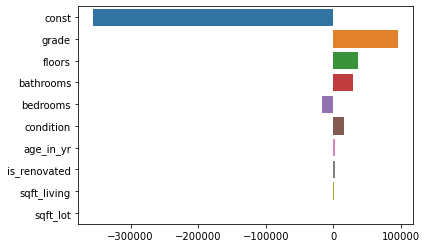

In [60]:
#creating tornadoe diagram of coefficent values
coeff = model.params
coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]
sns.barplot(x=coeff.values, y=coeff.index, orient='h');

By using a tornadoe diagram, the changes in the coefficents are more visually apparent. That sqft_living as a coefficent value has decreased so much is surprising.

## Assumptions of Linearity Model Two

## Linearity Model Two

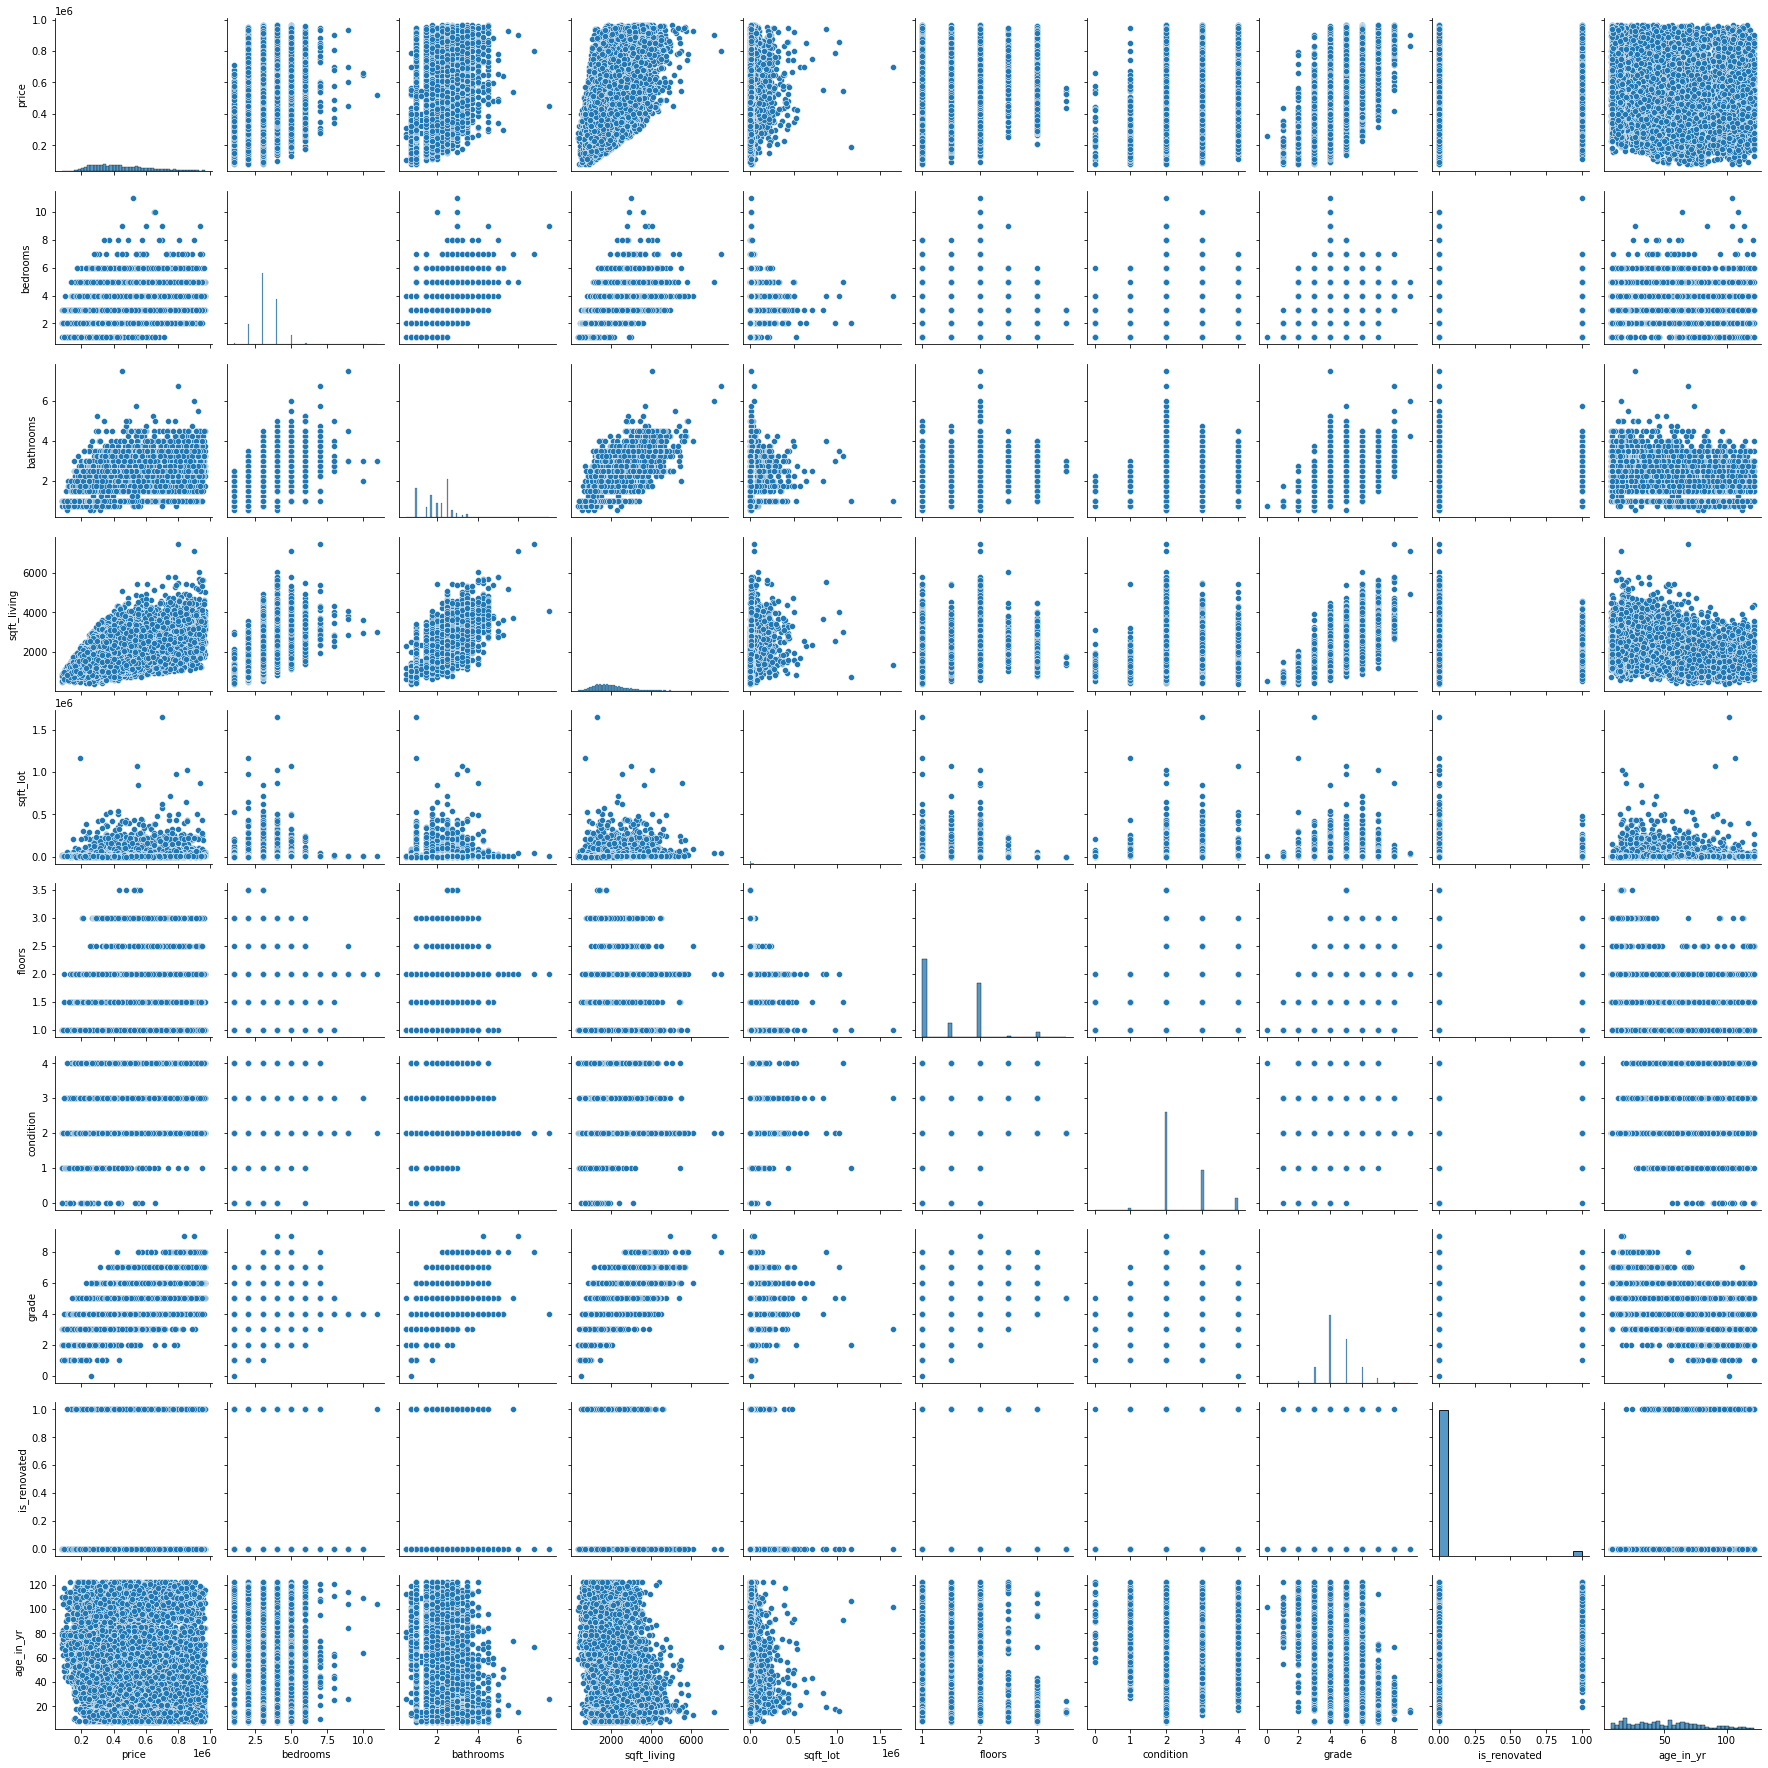

In [61]:
# Graph pairplots to determine linearity
sns.pairplot(df);

Of all the features, looking at the pairplots, it still seems that bathrooms, sqft_living, and sqft_lot are the most linear relationship. However, removing outliers seems to have decreased the linearity of those three features. Grade seems to have retained it's lineartiy without the outliers.

## Homosdascity Model Two

/Users/emilymarsh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/emilymarsh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


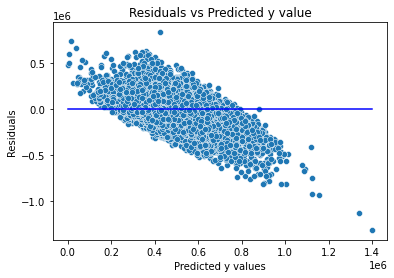

In [62]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('Predicted y values')
plt.ylabel('Residuals')

p = sns.lineplot([y_pred.min(),y_pred.max()],[0,0],color='blue')
p = plt.title('Residuals vs Predicted y value')

Again, the distributition of the data seems to follow a specific pattern and does not support the assumption of homosdascity. It seems also that the outliers that were eliminated actually had a more random dsitribution.

## QQ Plots Model Two

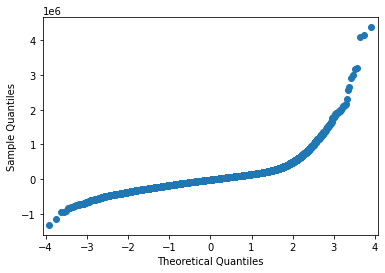

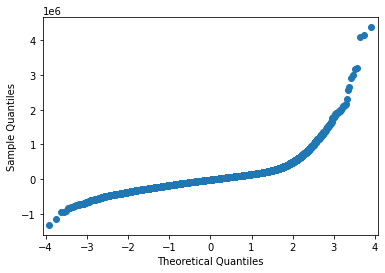

In [63]:
sm.qqplot(residuals)

The positive from the outliers being eliminated has been that the data is much more normally distributed. This was also shown in the model summary with the skew and kurtosis values being much less then in the first model. 

## Model Three: Log Transform

From analyzing the results of our second model, the relative scale of the features seems to be the next logical area to explore. That bathrooms as a feature has more significant relationship with the depedendent seems unlikely. It also seems wise to drop sqft_lot and is_renovated since both had such a high p-value in model two. 

In [64]:
df = df.drop(['sqft_lot', 'is_renovated'], axis = 1)

In [65]:
#log transforming the price column
non_normal = ['price']
for feat in non_normal:
    df[feat] = df[feat].map(lambda x: np.log(x))

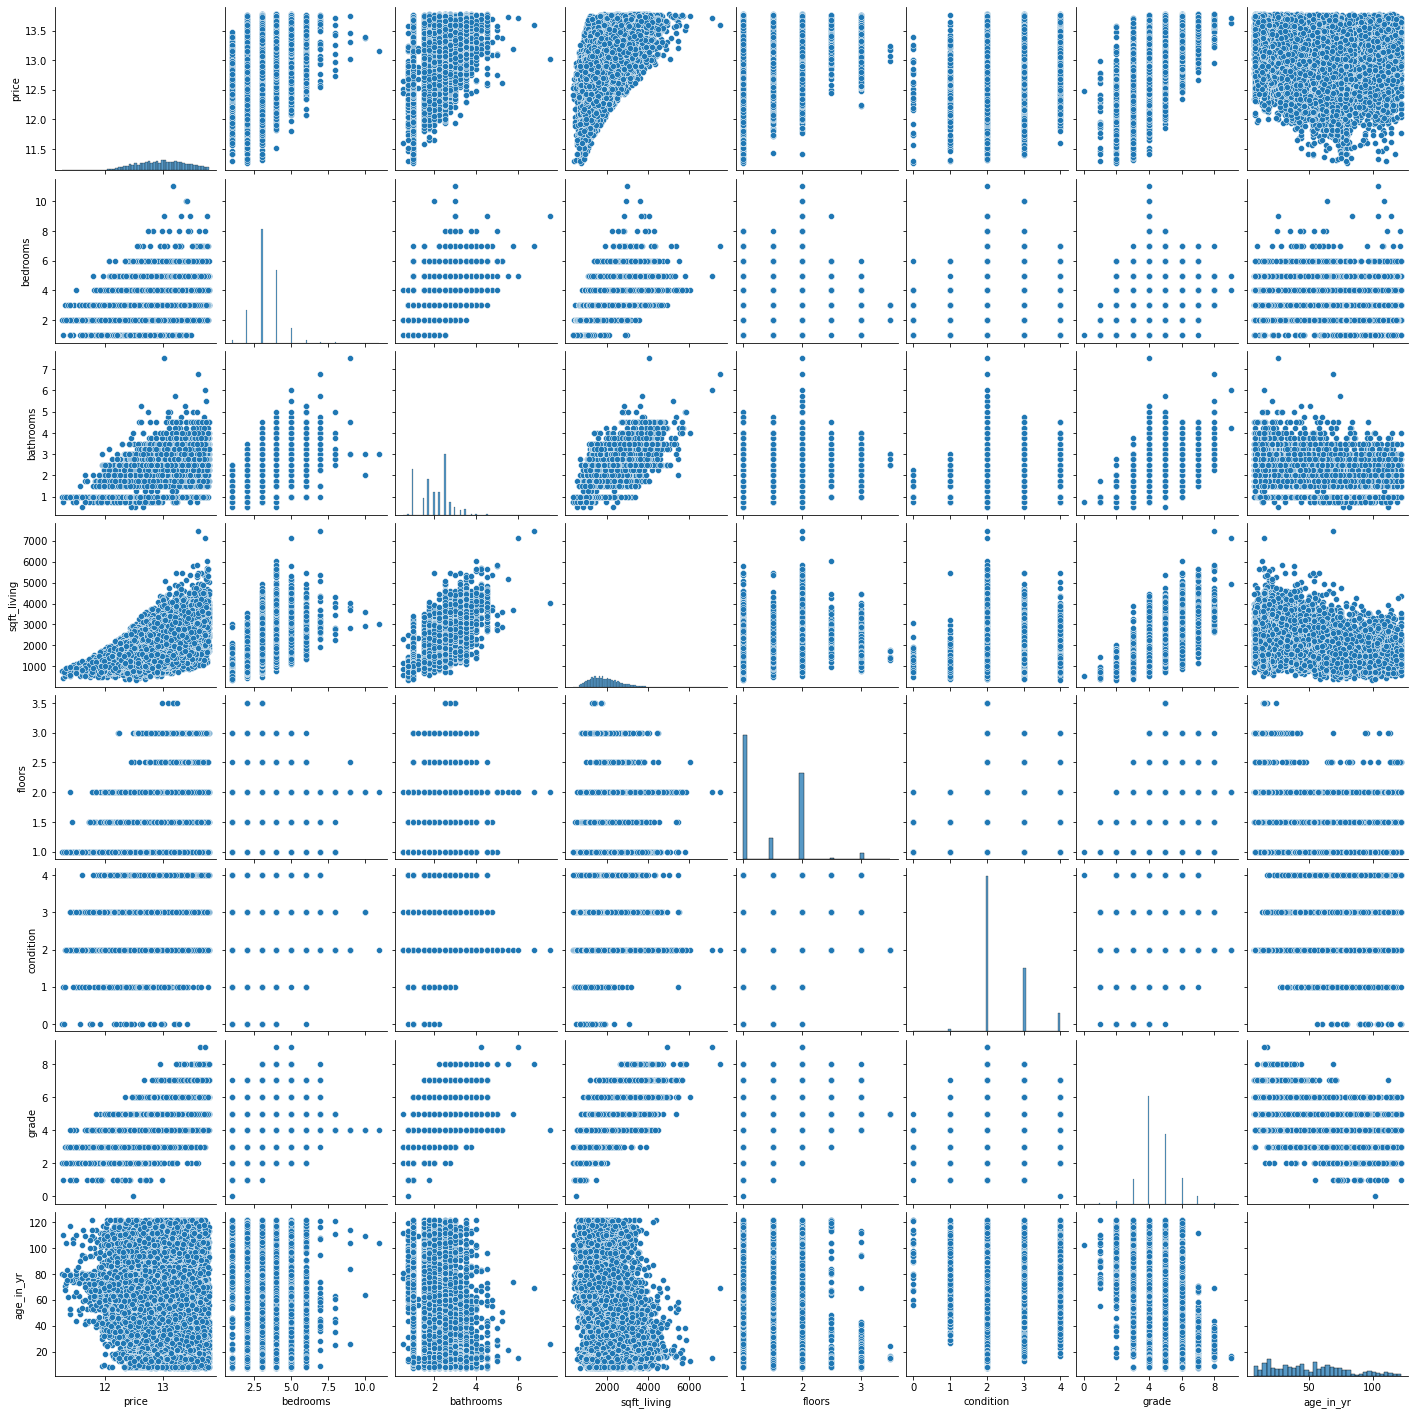

In [66]:
sns.pairplot(df)

In [67]:
predictors = df.drop(['price'], axis=1)
predictors_int = sm.add_constant(predictors)

model = sm.OLS(df['price'],predictors_int).fit()

In [68]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     2881.
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:57:39   Log-Likelihood:                -4439.9
No. Observations:               19940   AIC:                             8896.
Df Residuals:                   19932   BIC:                             8959.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.1338      0.019    592.002      0.000      11.097      11.171
bedrooms       -0.0307      0.003     -9.730      0.000      -0.037      -0.025
bathrooms       0.0837      0.005     16.245      0.000       0.074       0.094
sqft_living     0.0002    5.2e-06     31.821      0.000       0.000       0.000
floors          0.0863      0.005     17.108      0.000       0.076       0.096
condition       0.0387      0.004     10.756      0.000       0.032       0.046
grade           0.2087      0.003     63.392      0.000       0.202       0.215
age_in_yr       0.0054      0.000     53.680      0.000       0.005       0.006
==============================================================================
Omnibus:                      203.726   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.156
Skew:                          -0.245   Prob(JB):                     2.32e-46
Kurtosis:                       3.109   Cond. No.                     1.86e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
df = df.drop(['floors','condition','age_in_yr'], axis = 1)

In [70]:
predictors = df.drop(['price'], axis=1)
predictors_int = sm.add_constant(predictors)

model = sm.OLS(df['price'],predictors_int).fit()

In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     3538.
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:57:39   Log-Likelihood:                -6060.0
No. Observations:               19940   AIC:                         1.213e+04
Df Residuals:                   19935   BIC:                         1.217e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.9108      0.013    889.336      0.000      11.885      11.937
bedrooms       -0.0172      0.003     -5.052      0.000      -0.024      -0.011
bathrooms      -0.0102      0.005     -2.074      0.038      -0.020      -0.001
sqft_living     0.0002   5.56e-06     36.533      0.000       0.000       0.000
grade           0.1624      0.003     48.447      0.000       0.156       0.169
==============================================================================
Omnibus:                       99.565   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.795
Skew:                          -0.089   Prob(JB):                     1.73e-18
Kurtosis:                       2.741   Cond. No.                     1.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

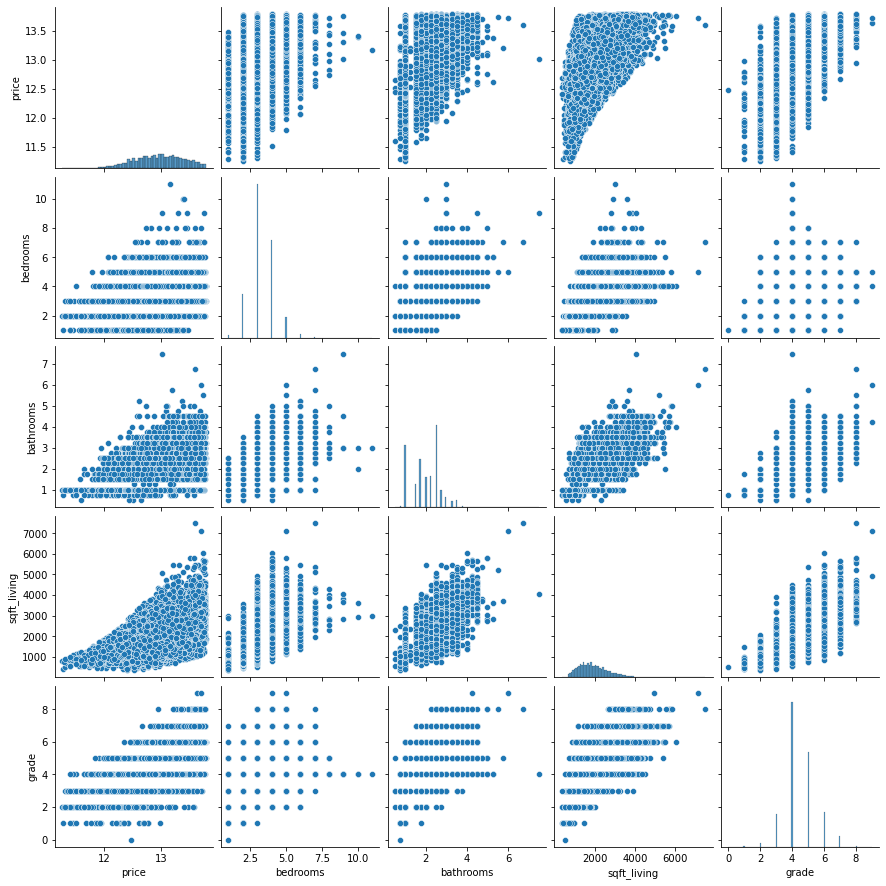

In [72]:
sns.pairplot(df)

## Normalization

In [73]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade'], dtype='object')

In [74]:
# Use min max scaling on dataset
minmax_scale = preprocessing.MinMaxScaler().fit(df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade']])
#df_minmax = pd.DataFrame(minmax_scale.transform(insurance_df[['age', 'bmi', 'children']]))
df_minmax = minmax_scale.transform(df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade']])

In [75]:
df_minmax

array([[0.41521655, 0.2       , 0.07142857, 0.11392405, 0.44444444],
       [0.76693593, 0.2       , 0.25      , 0.30942335, 0.44444444],
       [0.33210716, 0.1       , 0.07142857, 0.05625879, 0.33333333],
       ...,
       [0.65130666, 0.1       , 0.03571429, 0.09142053, 0.44444444],
       [0.64922615, 0.2       , 0.28571429, 0.17299578, 0.55555556],
       [0.56676434, 0.1       , 0.03571429, 0.09142053, 0.44444444]])

In [76]:
df_minmax.shape

(19940, 5)

In [77]:
# creating a copy of the dataframe
df3 = df.copy()


In [78]:
df3 = pd.concat([df3, pd.DataFrame(df_minmax)], axis=1)

In [79]:
df3.head()

,price,bedrooms,bathrooms,sqft_living,grade,0,1,2,3,4
0,12.309982,3.0,1.00,1180.0,4.0,0.415217,0.2,0.071429,0.113924,0.444444
1,13.195614,3.0,2.25,2570.0,4.0,0.766936,0.2,0.250000,0.309423,0.444444
2,12.100712,2.0,1.00,770.0,3.0,0.332107,0.1,0.071429,0.056259,0.333333
3,13.311329,4.0,3.00,1960.0,4.0,0.812891,0.3,0.357143,0.223629,0.444444
4,13.142166,3.0,2.00,1680.0,5.0,0.745710,0.2,0.214286,0.184248,0.555556


In [80]:
df3 = df3.drop(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade'], axis= 1)

In [81]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21429 entries, 0 to 19912
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       19940 non-null  float64
 1   1       19940 non-null  float64
 2   2       19940 non-null  float64
 3   3       19940 non-null  float64
 4   4       19940 non-null  float64
dtypes: float64(5)
memory usage: 1004.5 KB


In [82]:
df3.isna().any()

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [83]:
df3.isnull().sum()

0    1489
1    1489
2    1489
3    1489
4    1489
dtype: int64

In [84]:
df3 = df3.dropna()

In [85]:
df3.columns

Index([0, 1, 2, 3, 4], dtype='object')

In [86]:
#create predictors
predictors3 = df3.drop([0], axis=1)

# create model intercept
predictors_int3 = sm.add_constant(predictors3)

# fit model to data
model3 = sm.OLS(df3[0], predictors_int3).fit()

In [87]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     3538.
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:57:41   Log-Likelihood:                 12354.
No. Observations:               19940   AIC:                        -2.470e+04
Df Residuals:                   19935   BIC:                        -2.466e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2777      0.005     55.885      0.000       0.268       0.287
1             -0.0683      0.014     -5.052      0.000      -0.095      -0.042
2             -0.0283      0.014     -2.074      0.038      -0.055      -0.002
3              0.5732      0.016     36.533      0.000       0.542       0.604
4              0.5806      0.012     48.447      0.000       0.557       0.604
==============================================================================
Omnibus:                       99.565   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.795
Skew:                          -0.089   Prob(JB):                     1.73e-18
Kurtosis:                       2.741   Cond. No.                         24.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Standard Scaling

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19940 entries, 0 to 21596
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        19940 non-null  float64
 1   bedrooms     19940 non-null  int64  
 2   bathrooms    19940 non-null  float64
 3   sqft_living  19940 non-null  int64  
 4   grade        19940 non-null  int8   
dtypes: float64(2), int64(2), int8(1)
memory usage: 1.3 MB


In [89]:
# Scale features in dataframe
std_scale = preprocessing.StandardScaler().fit(df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade']])
df_std = std_scale.transform(df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade']])

In [90]:
# create a copy of dataframe
df4 = df.copy()

# drop old columns
df4 = df4.drop(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade'], axis=1)

In [91]:
df_std

array([[-1.50934449, -0.35778423, -1.47879148, -1.0238488 , -0.49000462],
       [ 0.55610614, -0.35778423,  0.31225678,  0.83727022, -0.49000462],
       [-1.99739928, -1.49272181, -1.47879148, -1.57281196, -1.49038263],
       ...,
       [-0.12291968, -1.49272181, -1.83700113, -1.23807832, -0.49000462],
       [-0.13513739, -0.35778423,  0.67046643, -0.46149629,  0.5103734 ],
       [-0.6193893 , -1.49272181, -1.83700113, -1.23807832, -0.49000462]])

In [92]:
df_std.shape

(19940, 5)

In [93]:
# create new DataFrame with minmax variables
#add NumPy matrix as new columns in DataFrame
df4 = pd.concat([df4, pd.DataFrame(df_std)], axis=1)

# view new DataFrame info
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21429 entries, 0 to 19912
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       19940 non-null  float64
 1   1       19940 non-null  float64
 2   2       19940 non-null  float64
 3   3       19940 non-null  float64
 4   4       19940 non-null  float64
dtypes: float64(5)
memory usage: 1004.5 KB


In [94]:
df4 = df4.dropna()

In [95]:
# create predictors
predictors4 = df4.drop([0], axis=1)

# create model intercept
predictors_int4 = sm.add_constant(predictors4)

# fit model to data
model4 = sm.OLS(df4[0], predictors_int4).fit()


In [96]:
# view model results
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     3538.
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:57:41   Log-Likelihood:                -22945.
No. Observations:               19940   AIC:                         4.590e+04
Df Residuals:                   19935   BIC:                         4.594e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.804e-15      0.005   7.02e-13      1.000      -0.011       0.011
1             -0.0353      0.007     -5.052      0.000      -0.049      -0.022
2             -0.0166      0.008     -2.074      0.038      -0.032      -0.001
3              0.3536      0.010     36.533      0.000       0.335       0.373
4              0.3787      0.008     48.447      0.000       0.363       0.394
==============================================================================
Omnibus:                       99.565   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.795
Skew:                          -0.089   Prob(JB):                     1.73e-18
Kurtosis:                       2.741   Cond. No.                         3.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

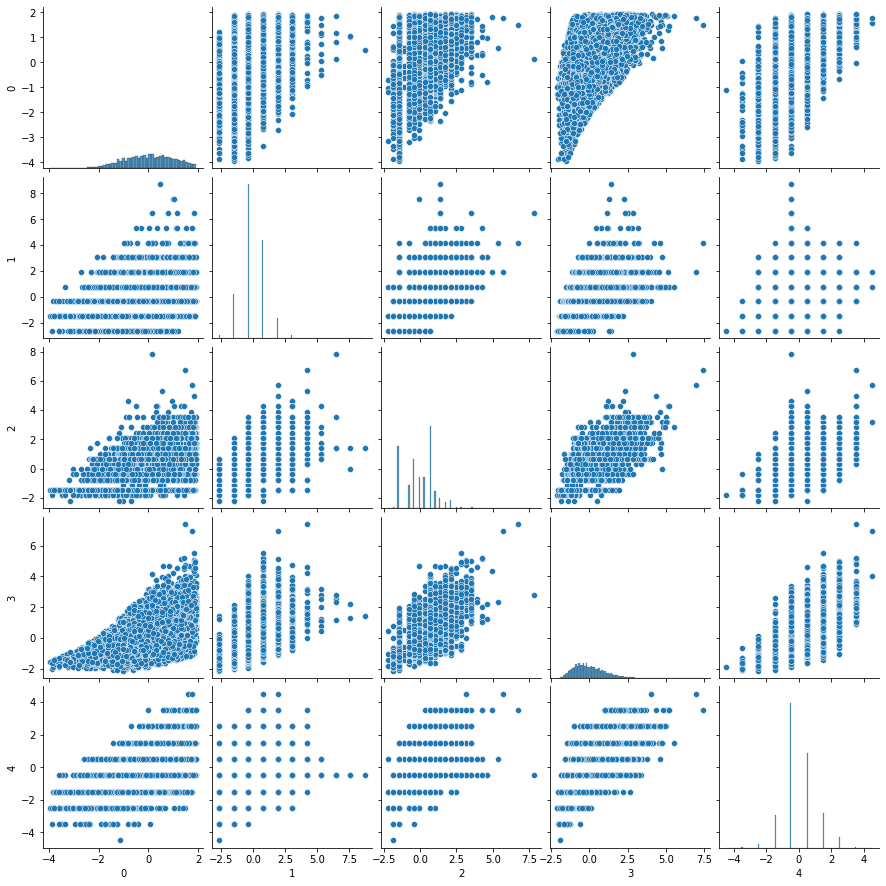

In [102]:
sns.pairplot(df4)

## Mean of Residuals = 0

In [97]:
# calculate and print the mean of residuals
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 2.6542406879603827e-07


## Independence of Residuals

## Autocorrelation

In [98]:
durbin_watson(residuals)

1.9833331430387051

/Users/emilymarsh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


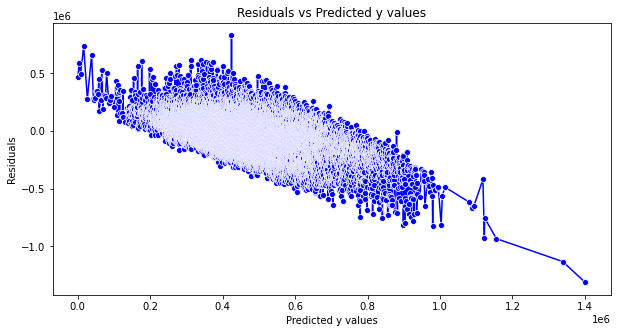

In [99]:
# check for autocorrelation using lineplot
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('Predicted y values')
plt.ylabel('Residuals')
#plt.xlim(70,100)
#p = sns.lineplot([70,100],[0,0],color='red')
p = plt.title('Residuals vs Predicted y values');

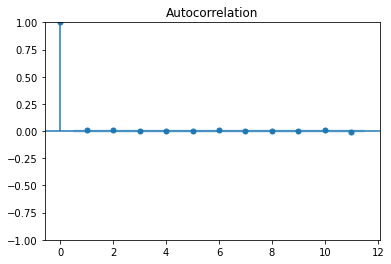

In [100]:
# check for autocorrelation with ACF
sm.graphics.tsa.plot_acf(residuals, lags=11)
plt.show()


## No Perfect Multicollinearity

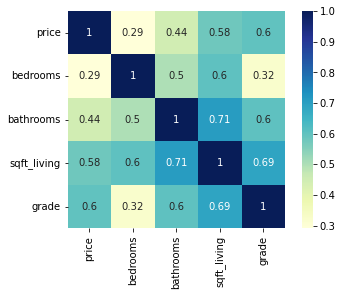

In [101]:
sns.heatmap(df.corr(), annot=True,cmap='YlGnBu',square=True);